In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# MCMC:

A way to do integrals!

## When using MCMC:


If you don't have ohter way to solve your problem, beacusr you can't say if the 
answer you are getting is correct.

## 

If your problem have $D$ dimensiones and $N_{grid}$ per/dimension you would have $N_{grid}^D$
your likelihhod would have a lot of grids and this is hard to compute.

But must of the times you need projections (marginalizations) then you would need 
to compute the likelihood in some regions of the D space. MC is a way of sampling this grid.
rmemeebr the important thing is that the hitogram alog one dimension of the D space is weel sampled.

\begin{equation}
\#MC/grid = \dfrac{N_{MC}}{N_{gird}} -> \epsilon = \sqrt{\dfrac{N_{grid}}{N_{MC}}}
\end{equation}

\begin{equation}
\epsilon^2 = \dfrac{N_{grid}}{N_{MC}} -> N_{MC} = \dfrac{N_{grid}}{\epsilon^2} 
\end{equation}

MC is efficient when:

\begin{equation}
\dfrac{N_{grid}}{\epsilon^2} < N_{grid}^D -> N_{grid}^{D-1} > \epsilon^{-2}
\end{equation}

\begin{equation}
D>1 \dfrac{2 log \epsilon}{log (N_{grid})} 
\end{equation}
You would not able to do model selections, because you dont know the global minimal value of the likelihood

\begin{equation}
 P(model|data) = C P_{pr}(model) P(data|model)
\end{equation}

To compute the likelihood we would like to usea something like th rejection method but we woud like to 
do a more optmize method.

## Markov Chain

Is a series of Numbers in one dimension in which the next element in the series depend just in the previous element, they don't have memory.A random walk is an example of a Markov Chain. 

## Metropolis-Hastins (famous physicist at los alamos)

its a Markov Chain method, that its not symmetric


## Gibbs

a more generelize approach


## MCMC Metropolis Hastings in 1D

1. start with some value of $x_i$
2. use q(x_i+1|x_i) to draw $x_{i+1}$
3. Calculate the ratio $R=\dfrac{P(x_{i+1})}{P(x_i)}$
4. if $R>1$ -> accept $x_{i+1}$ 
5. if $R<1$ draw a random number $0<P<1$
if $P<R$ accept $x_{i+1}$ otherwise repeat $x_i$

In [71]:
def likelihood(x):
    x_1 = 1.0
    x_2 = 0.5
    n = 0.3
    sigma_1 = 0.1
    sigma_2 = 0.1
    L = n / (2*np.pi*sigma_1**2.0) * np.exp(-(x - x_1)**2.0/(sigma_1**2.0)) + (1+n)/(2*np.pi*sigma_2**2.0) * np.exp(-(x - x_2)**2.0/(sigma_2**2.0))
    return L   

In [72]:
likelihood(0.98)

4.5874316573874063

In [115]:
def MCMC(N_points, sigma_q):
    y = np.zeros(N_points)
    x = np.zeros(N_points)
    acpt = 0
    x[0] = 1.0
    y[0] = likelihood(x[0])
    for i in range(1,N_points):
        x_new = np.random.normal(x[i-1], sigma_q)
        y_new = likelihood(x_new)
        R = y_new/y[i-1]
        if R>=1.0:
            x[i] = x_new
            y[i] = likelihood(x_new)
            acpt +=1
          
        else:
            P = random.random(1)
            if P < R:
                x[i] = x_new
                y[i] = likelihood(x_new)
                acpt +=1
            else:
                x[i] = x[i-1]
                y[i] = likelihood(x[i-1])
    return x, acpt

In [106]:
x_test, acpt1 = MCMC(1000000, 0.01)

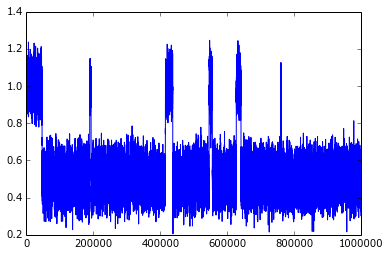

In [107]:
plot(x_test)

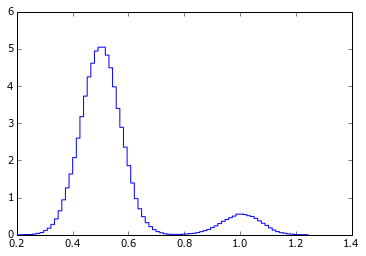

In [108]:
h = hist(x_test, histtype='step', bins=80, normed=True)

## Burn-in period

$\sigma_q = 0.01$

$N_{MC} = 10^6$

$N_{burnin} = 10^4$





In [103]:
x_test2, acpt2 = MCMC(1000000, 0.01)

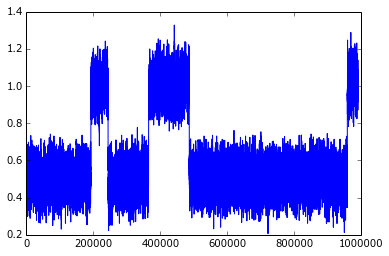

In [104]:
plot(x_test2[10000:])

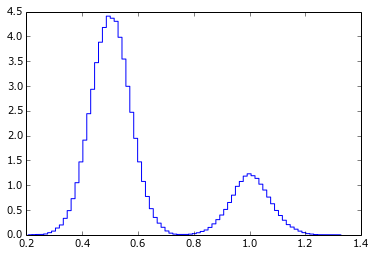

In [111]:
h = hist(x_test2, histtype='step', bins=80, normed=True)

 it may happens that the second gaussian is very far from thw other one, then is not likely 
to make a step to go to the other gaussian, the solution is then make longer steps

In [110]:
x_test3, acpt3 = MCMC(1000000, 0.1)

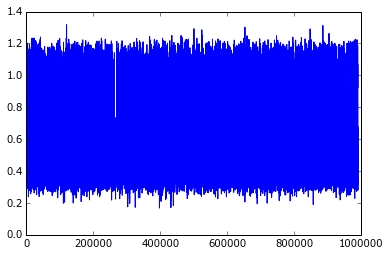

In [112]:
plot(x_test3[10000:])

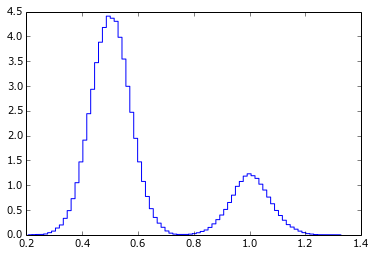

In [113]:
h = hist(x_test2, histtype='step', bins=80, normed=True)

In [ ]:
The acceptance rate of the algorithm. 


In [116]:
x_test4, acpt4 = MCMC(1000000, 0.5)

In [117]:
x_test5, acpt5 = MCMC(1000000, 1.0)

In [118]:
print acpt4/1E6
print acpt5/1E6

0.236673
0.13363


# Hastings Variance

Use this when you have aboundaries in your system use this, beacuse
your likelihhod is not going to be symmetric.


$q(x_{i+1|x_i}) != q(x_i|x_{i+1}))$

\begin{equation}
R = \dfrac{P(x_{i+1})q(x_{i+1|x_i}}{P(x_i)q(x_i|x_{i+1})} 
\end{equation}


# Random gaussian update

\begin{equation}
q(x_{i+1|x_i}) = \dfrac{1}{2\pi\sigma_q^2}exp\left[- \dfrac{(x_{i+1}-x_i)^2}{2\sigma_q^2}right]
\end{equation}

# Independece sampler

\begin{equation}
q(x_{i+1|x_i}) = constant
\end{equation}

# Langevin update

\begin{equation}
x_{i+1} = x_i + \epsilon + \dfrac{\sigma}{2}\nabla log(P)|_x
\end{equation}

# N dimensional MCMC

Now everything is vectors:

\begin{equation}
\vec{X_{i+1}} = \vec{Q} \dot \vec{X_i}
\end{equation}

What you choose for R is an art.

You can do it in diagonal in Q


### Gibbs sampling:

If you have correlation is your data
$q(x_{i+1}^k|x_{i+1}^1, ..., x_{i+1}^{k-1}, x_{i}^k...)$

In [129]:
def likelihood2(x, y):
    x_0 = 1.0
    y_0 = 2.0
    sigma_1 = 0.1
    sigma_2 = 0.2
    rho = 0.8
    Z = (x-x_0)**2.0/(sigma_1**2.0) + (y-y_0)**2.0/(sigma_2**2.0) - 2*rho*(x-x_0)*(y-y_0)/(sigma_1*sigma_2)
    L = 1 / (2*np.pi*sigma_1*sigma_2*np.sqrt(1-rho**2.0)) * np.exp(-(Z)/(2*(1 - rho**2.0)))
    return L   

In [140]:
def MCMC_ND(N_points, sigma_q):
    L = np.zeros(N_points)
    x = np.zeros(N_points)
    y = np.zeros(N_points)
    acpt = 0
    x[0] = 1.0
    y[0] = 2.0
    L[0] = likelihood2(x[0], y[0])
    for i in range(1,N_points):
        x_new = np.random.normal(x[i-1], sigma_q)
        y_new = np.random.normal(y[i-1], sigma_q)
        L_new = likelihood2(x_new, y_new)
        R = L_new/L[i-1]
        if R>=1.0:
            x[i] = x_new
            y[i] = y_new
            L[i] = likelihood2(x_new, y_new)
            acpt +=1          
        else:
            P = random.random(1)
            if P < R:
                x[i] = x_new
                y[i] = y_new
                L[i] = likelihood2(x_new, y_new)
                acpt +=1
            else:
                x[i] = x[i-1]
                y[i] = y[i-1]
                L[i] = likelihood2(x[i-1], y[i-1])
    return x, y, acpt

In [145]:
xND1, YND1, acpt5 = MCMC_ND(1000, 0.01)

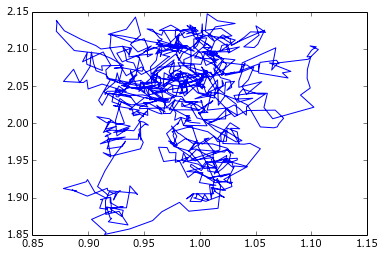

In [146]:
plot(xND1, YND1)

# References:

http://www.mcmchandbook.net/HandbookTableofContents.html
